# 3주차 미션

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

### Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

딕셔너리

In [2]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [3]:
# 연령대코드(5세단위)의 값을 age_code로 대체하고,
# 컬럼명을 연령대로 변경
df1= df.replace({'연령대코드(5세단위)':age_code}).rename(columns={'연령대코드(5세단위)':'연령대'})

In [4]:
# 연령대별 허리둘레에 대한 기술통계 by groupby
df1.groupby(['연령대'])['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [5]:
# pivot_table 로 기술통계 표현
df1.pivot_table(index='연령대',values='허리둘레',
               aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


### Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

/var/folders/nr/0pg07f8n56n3jfksqk_3y0500000gn/T/ipykernel_3430/1859019216.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr,dtype=np.bool))


<AxesSubplot: >

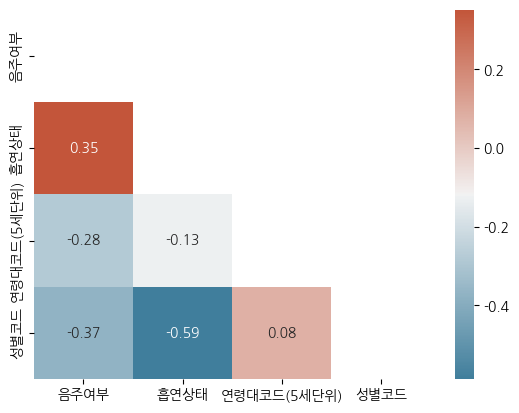

In [63]:
corr = df[['음주여부','흡연상태','연령대코드(5세단위)','성별코드']].corr()
#상관계수 결과 값 corr로 저장

mask = np.triu(np.ones_like(corr,dtype=np.bool))              
#np.triu() : 위쪽 삼각형을 반환 

cmap = sns.diverging_palette(230, 20, as_cmap=True)
# 색상 설정

sns.heatmap(corr,annot=True,fmt=".2f",mask=mask, cmap = cmap)
#히트맵 생성
# mask 인수를 이용하여 마스크

### Q3. 문제 : 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
* - 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 
다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!
    
    

In [6]:
 # 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
    # 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}
    
    # df["흡연"]
   
    # df["음주"]

In [13]:
df2 = df.replace({'흡연상태':smoke,'음주여부':drink})
# replace로 대체
df2=df2.rename(columns={'흡연상태':'흡연',"음주여부":"음주"})
#column명 변경
df2.head()


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연,음주,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126


In [21]:
#crosstab을 활용한 빈도수 구하기
pd.crosstab(df2['음주'],df2['흡연'],margins=False)


흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


In [22]:
#groupby를 활용한 빈도수 구하기
df2.groupby(['음주'])['흡연'].value_counts()

음주   흡연  
마심   흡연안함    213743
     흡연중     162166
     끊음      120779
안마심  흡연안함    394503
     끊음       55334
     흡연중      52845
Name: 흡연, dtype: int64

<AxesSubplot: xlabel='음주'>

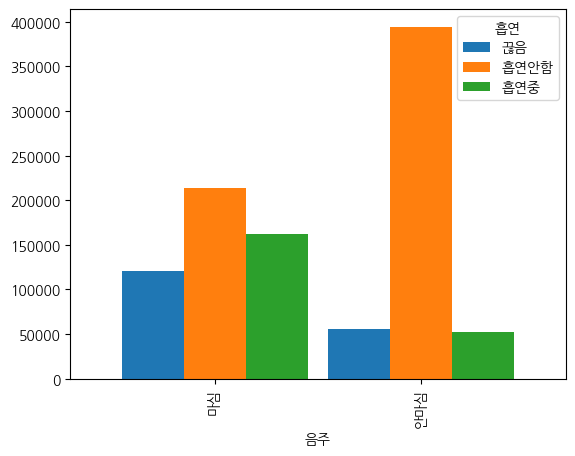

In [23]:
pd.crosstab(df2['음주'],df2['흡연'],margins=False).plot(kind='bar',width=0.9)

<AxesSubplot: xlabel='음주', ylabel='count'>

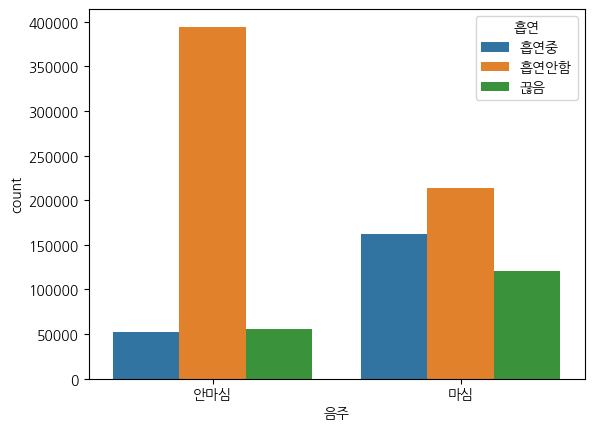

In [25]:
sns.countplot(data=df2, x='음주',hue='흡연')

### Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화 해주세요!
* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [26]:
# Q3에서 쓴 딕셔너리를 사용하기 때문에 df2를 가지고와 사용
df3 = df2[df['체중(5Kg 단위)']>=120]

df3.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연,음주,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
1219,2017,1220,2,6,41,170.0,120.0,116.0,0.7,0.9,...,47.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
2309,2017,2310,1,6,30,190.0,155.0,127.0,0.8,0.9,...,19.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
3497,2017,3498,1,7,46,175.0,120.0,119.0,1.2,1.2,...,111.0,흡연중,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
3685,2017,3686,1,7,30,180.0,140.0,127.0,1.5,1.5,...,58.0,끊음,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
5788,2017,5789,1,8,41,175.0,140.0,124.0,1.0,1.0,...,35.0,흡연안함,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126


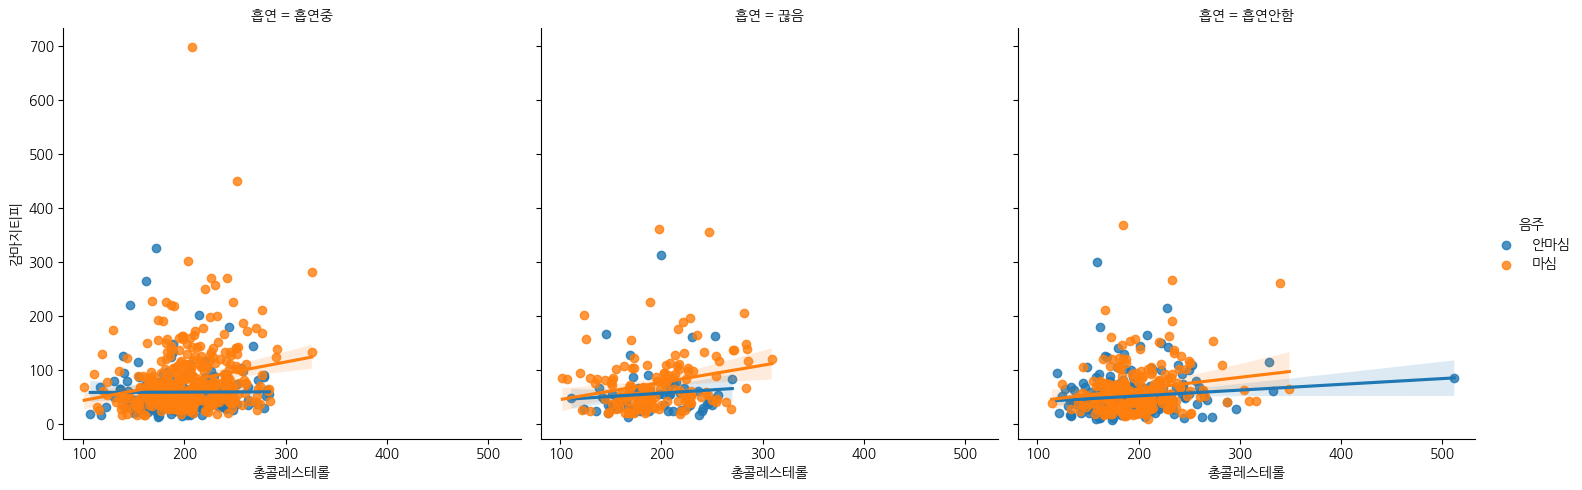

In [27]:
sns.lmplot(data=df3, x='총콜레스테롤',y='감마지티피',col='흡연',hue='음주')

### Q5. 문제 : 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!
* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! ([https://www.youtube.com/watch?v=ZTRKojTLE8M](https://www.youtube.com/watch?v=ZTRKojTLE8M))
* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.



In [33]:
#Q1에서 사용한 연령대 column을 사용하기 위해 df1을 가져옴
df1.head()

,기준년도,가입자일련번호,성별코드,연령대,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,35~39세,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [50]:
# 먼저 좌우 시력의 평균을 내기전에 시력 전처리 과정을 거침
df1_r = df1[df['시력(우)']==9.9].index
df1_l = df1[df['시력(좌)']==9.9].index

df5 = df1.drop(df1_r)
df5 = df1.drop(df1_l)

df5.head()

,기준년도,가입자일련번호,성별코드,연령대,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,35~39세,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [51]:
# 시각화
df5.groupby(['연령대','성별코드'])['시력(좌)'].mean()

연령대     성별코드
20~24세  1       1.092088
        2       0.989020
25~29세  1       1.108807
        2       1.016223
30~34세  1       1.116810
        2       1.028945
35~39세  1       1.137300
        2       1.057884
40~44세  1       1.115202
        2       1.027259
45~49세  1       1.052915
        2       0.955033
50~54세  1       1.002117
        2       0.909677
55~59세  1       0.954576
        2       0.860812
60~64세  1       0.880873
        2       0.787469
65~69세  1       0.805634
        2       0.710081
70~74세  1       0.734978
        2       0.649222
75~79세  1       0.658341
        2       0.585453
80~84세  1       0.598952
        2       0.529375
85세+    1       0.516524
        2       0.423985
Name: 시력(좌), dtype: float64

In [53]:
df5.groupby(['연령대','성별코드'])['시력(우)'].mean()

연령대     성별코드
20~24세  1       1.088477
        2       0.985619
25~29세  1       1.107098
        2       1.007996
30~34세  1       1.118948
        2       1.026572
35~39세  1       1.142401
        2       1.054309
40~44세  1       1.127593
        2       1.027172
45~49세  1       1.067863
        2       0.957350
50~54세  1       1.018529
        2       0.916575
55~59세  1       0.981760
        2       0.878361
60~64세  1       0.924841
        2       0.814917
65~69세  1       0.862595
        2       0.751173
70~74세  1       0.823811
        2       0.715475
75~79세  1       0.784463
        2       0.675824
80~84세  1       0.776719
        2       0.632423
85세+    1       0.784764
        2       0.601973
Name: 시력(우), dtype: float64

<AxesSubplot: xlabel='시력(좌)', ylabel='연령대'>

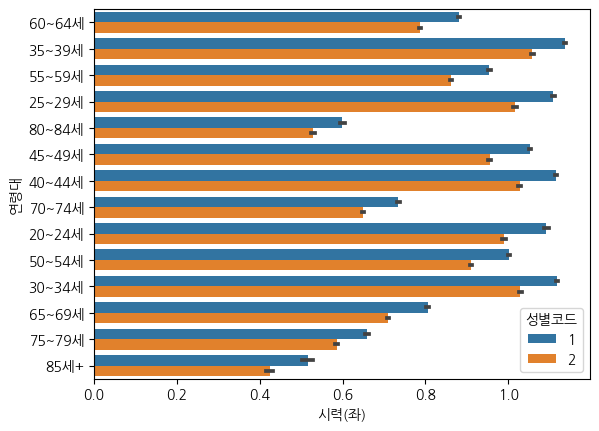

In [62]:
# 시각화 시력 
sns.barplot(x='시력(좌)',y='연령대',data=df5, hue='성별코드',orient='h')

<AxesSubplot: xlabel='연령대', ylabel='시력(우)'>

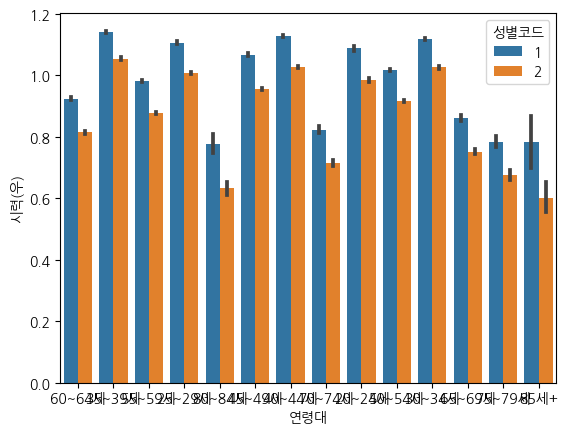

In [60]:
sns.barplot(x='연령대',y='시력(우)',data=df5, hue='성별코드')